# Dataset Name: Spotify Song Tracks 
---
[Dataset](https://www.kaggle.com/datasets/nandhakumarss/spotify-song-tracks)

### Objectives
Below are the objectives that I've tried to find the answers of doing EDA (Exploratory Data Analysis)
- Top 5 most popular artists
- Top 5 loudest tracks
- Artist with the most danceability song
- Top 10 instrumentalness tracks
- Acousticness of tracks wil popolarity more than 70

## Import libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [109]:
df=pd.read_csv("C:/Users/Admin/Desktop/Programs/Datasets/Spotify/SpotifyFeatures.csv")
df.drop("time_signature", axis=1, inplace=True)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,0.390


## Data Cleaning

In [110]:
df.nunique()

genre                   27
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
valence               1692
dtype: int64

In [111]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  valence           23

In [113]:
df.shape

(232725, 17)

In [114]:
len(df.columns)

17

In [115]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [116]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


## Data Analysis

### Top 5 most popular artists

In [117]:
top_five_artists = df.groupby("artist_name").count().sort_values(by="track_name", ascending=False)["track_name"][:5]
top_five_artists

artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
Name: track_name, dtype: int64

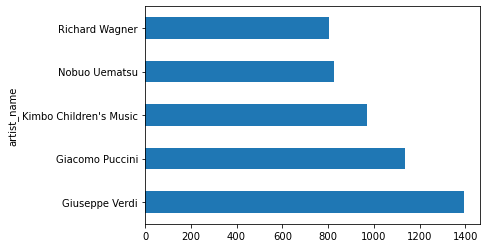

In [118]:
top_five_artists.plot.barh()
plt.show()

### Top 5 loudest tracks

In [119]:
top_five_loudest_track=df[["loudness","track_name","artist_name"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_track

,loudness,track_name,artist_name
218717,-52.457,Call to Wake,Shakuhachi Sakano
218540,-47.669,Neroli,Brian Eno
126046,-47.599,"La Damnation de Faust, Op. 24, H. 111: Pt. II,...",Hector Berlioz
203063,-47.499,Limes - Instrumental,Thomas Newman
126602,-47.432,"Variations On A Theme Of Chopin, Op.22: Variat...",Sergei Rachmaninoff


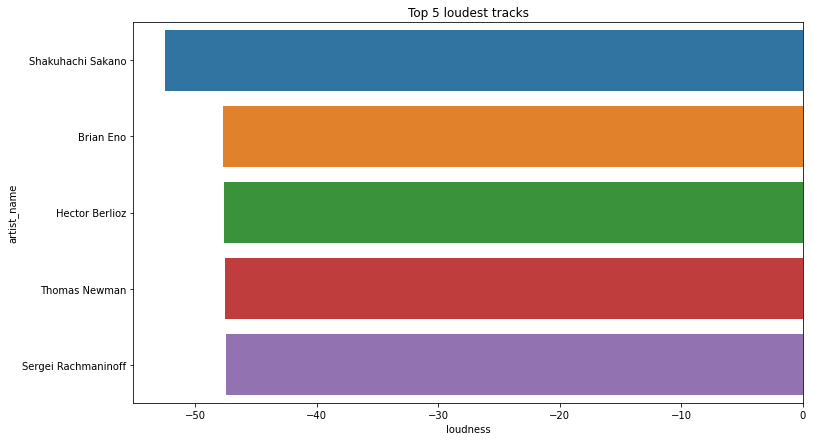

In [120]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness", y="artist_name", data=top_five_loudest_track)
plt.title("Top 5 loudest tracks")
plt.show()

### Artist with the most danceability song

In [121]:
most_danceable_track=df[["danceability","track_name","artist_name"]].sort_values(by="danceability", ascending=False)[:5]
most_danceable_track

,danceability,track_name,artist_name
75396,0.989,Fuzzy Wuzzy,Juice Music
75762,0.987,I've Been Everywhere,Juice Music
26911,0.987,Sol Clap,Quantic
178675,0.987,Sol Clap,Quantic
90205,0.986,Go Girl,Pitbull


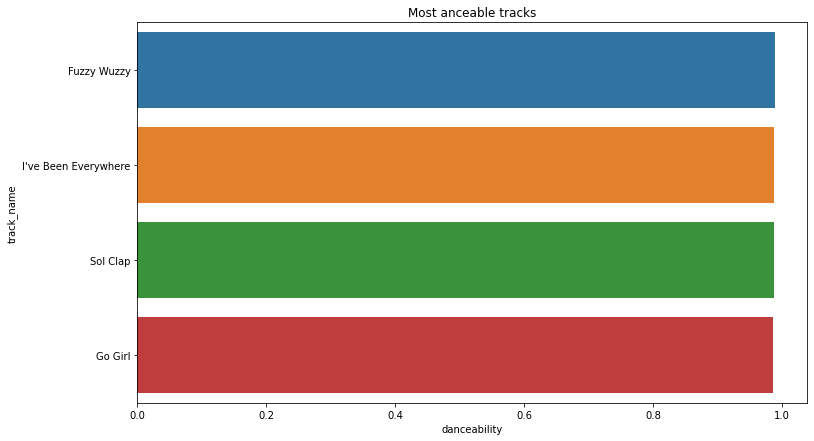

In [122]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="track_name",data=most_danceable_track)
plt.title("Most anceable tracks")
plt.show()

### Top 10 instrumentalness tracks

In [123]:
top_ten_instrumentalness_track=df[["instrumentalness","track_name","artist_name"]].sort_values(by="instrumentalness", ascending=False)[:10]
top_ten_instrumentalness_track

,instrumentalness,track_name,artist_name
199660,0.999,"Opening Titles - From ""Jurassic Park"" Soundtrack",John Williams
203562,0.998,I Know What I Saw,Kyle Dixon & Michael Stein
31144,0.997,Kingdom of Burmecia,Nobuo Uematsu
76749,0.997,My Bonnie Lies Over the Ocean - Instrumental,Children Songs Company
34781,0.996,スリルのテーマ 〜サスペンス,Capcom Sound Team
218722,0.996,Walking on Air,Shakuhachi Sakano
205376,0.996,It's A Real Job - Score,John Debney
199672,0.994,The Passing Of Théoden,Howard Shore
194160,0.994,The Orville End Titles,Bruce Broughton
198336,0.994,The Patronus Light,John Williams


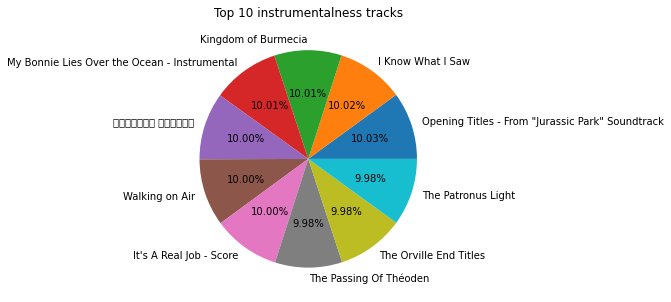

In [128]:
plt.figure(figsize=(12,5))
plt.pie(x="instrumentalness",data=top_ten_instrumentalness_track,autopct='%1.2f%%',labels=top_ten_instrumentalness_track.track_name)
plt.title("Top 10 instrumentalness tracks")
plt.show()

### Acousticness of tracks wil popolarity more than 70

In [125]:
popularity_more_than_70=df[df.popularity > 70].sort_values(by="popularity", ascending=False)
popularity_more_than_70

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,0.335
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110417,Pop,Jason Derulo,It Girl,4fINc8dnfcz7AdhFYVA4i7,71,0.0165,0.668,192200,0.718,0.000000,C#,0.1040,-4.736,Minor,0.0605,91.993,0.345
110407,Pop,Bright Eyes,First Day Of My Life,5OiaAaIMYlCZONyDBxqk4G,71,0.9150,0.468,188800,0.201,0.000083,E,0.0952,-17.024,Major,0.0388,94.422,0.383
110396,Pop,BTS,Airplane pt.2,1trFxVLL8WKhYap543e74l,71,0.0268,0.769,218615,0.817,0.000100,C,0.0840,-4.092,Minor,0.0339,139.979,0.866
110387,Pop,Dr. Dre,The Next Episode,4LwU4Vp6od3Sb08CsP99GC,71,0.0279,0.916,161507,0.906,0.000000,D#,0.0803,-2.494,Minor,0.1950,95.300,0.291


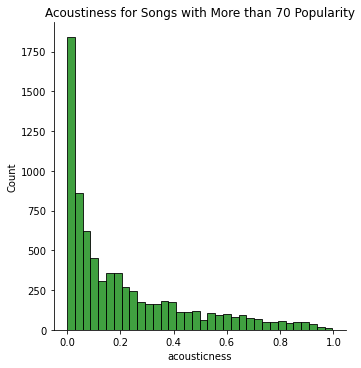

In [134]:
sns.displot(popularity_more_than_70["acousticness"],color="green")
plt.title('Acoustiness for Songs with More than 70 Popularity')
plt.show()